# Ensemble Methods Exercise (5 points)

The homework assignment is due by the end of the day on Tuesday, October 28.

Please make sure to solve the assignment problems yourself and obey the university's policies on academic honesty and integrity. Remember that copying and pasting solutions from AI coding assistants, webpages, classmates, or anywhere else is considered plagiarism and academic dishonesty.

**Note that your solutions are expected to follow the code examples provided in the lecture notes. If your solution to a problem uses functions or codes that are not covered in the lecture notes, that will result in zero marks assigned for that problem.**

To ensure that all cells in the submitted notebooks execute correctly and without errors, after completing all problems and before submitting the notebook, it is recommended to select `Kernel -> Restart Kernel and Run All Cells...`.

Ensemble Methods exercise: 5 points

Total points for Assignment 4: 25 points

Import the file `planes.csv` from the data folder as a pandas DataFrame called `data`.

The dataset has information about different types of airplanes, including the number of tails, year of production, type, manufacturer, model, number of engines, seat, speed, and engine type.

In this exercise, we are going to train a classifier to predict the engine type based on the provided information.

In [5]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Assignment_4_October_8/data/planes.csv'

data = pd.read_csv(file_path)


Mounted at /content/drive


## Exploratory Data Analysis (1 point)

Perform a brief Exploratory Data Analysis. Display summary statistics, handle missing values (if the number of missing values is less than 100 remove those rows, and if it is greater than 1,000 remove those columns), if needed remove unnecessary columns, check the data distribution, and report if there are correlated features.

### 1. Summary Statistics ###
              year      engines        seats
count  3249.000000  3249.000000  3249.000000
mean   2000.510926     1.997230   154.899046
std       7.141253     0.100759    73.212826
min    1956.000000     1.000000     2.000000
25%    1997.000000     2.000000   140.000000
50%    2001.000000     2.000000   149.000000
75%    2005.000000     2.000000   182.000000
max    2013.000000     4.000000   450.000000
--------------------------------------------------
### 2. & 3. Missing Value Analysis and Handling ###
Initial Missing Value Counts:
Series([], dtype: int64)
--------------------------------------------------

DataFrame shape after handling missing values: (3249, 8)
--------------------------------------------------
--------------------------------------------------
### 4. Data Distribution (Histograms) ###


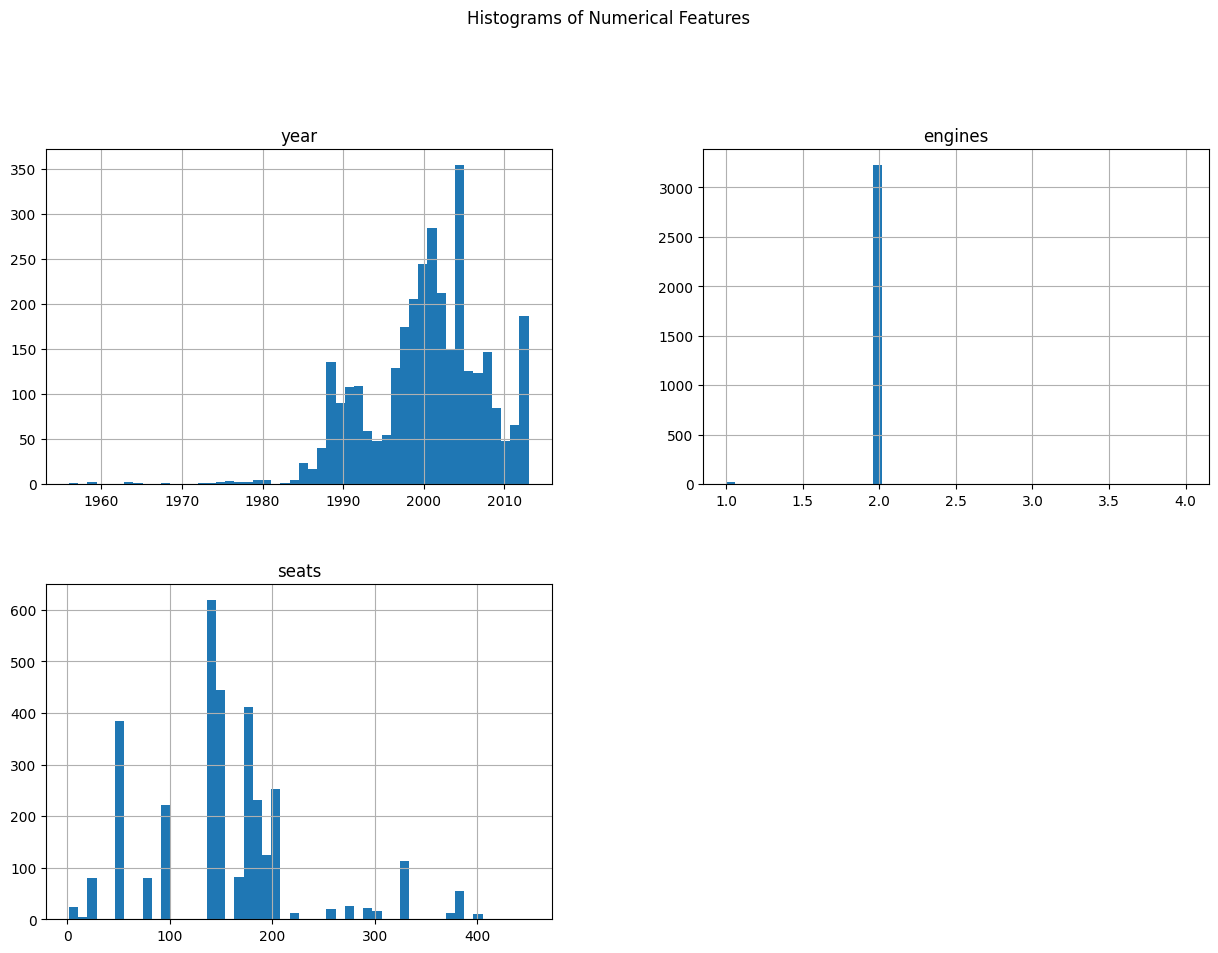

--------------------------------------------------
### 5. Correlated Features ###


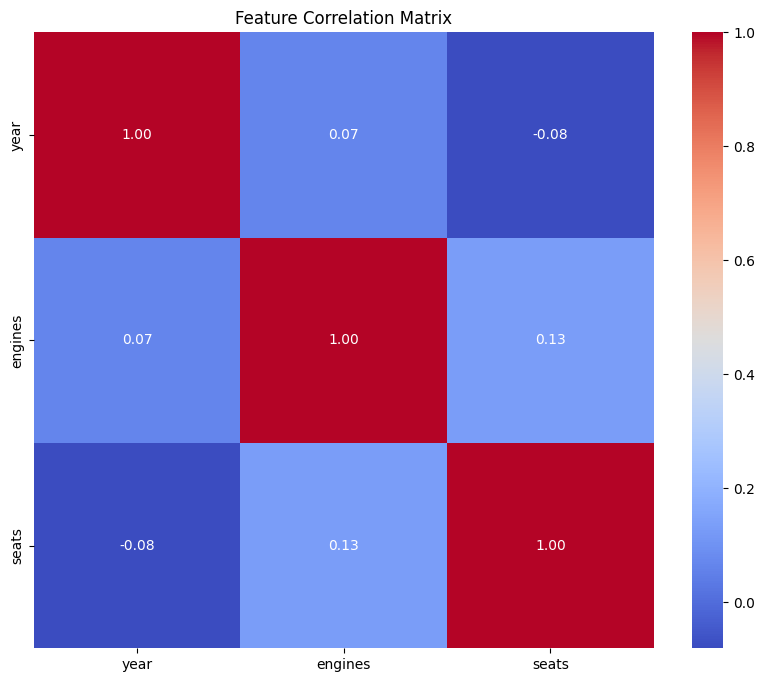


No highly correlated feature pairs found (Absolute Correlation > 0.9).
--------------------------------------------------


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("### 1. Summary Statistics ###")
print(data.describe())
print("-" * 50)

print("### 2. & 3. Missing Value Analysis and Handling ###")
missing_counts = data.isnull().sum()
print("Initial Missing Value Counts:")
print(missing_counts[missing_counts > 0])
print("-" * 50)

rows_to_drop = []
cols_to_drop = []

for col, count in missing_counts.items():
    if 0 < count < 100:
        print(f"Dropping {count} rows where column '{col}' is NaN.")
        rows_to_drop.extend(data[data[col].isnull()].index.tolist())
    elif count > 1000:
        print(f"Dropping column '{col}' with {count} missing values (> 1,000 threshold).")
        cols_to_drop.append(col)

if rows_to_drop:
    data.drop(index=list(set(rows_to_drop)), inplace=True)

if cols_to_drop:
    data.drop(columns=cols_to_drop, inplace=True)

print(f"\nDataFrame shape after handling missing values: {data.shape}")
print("-" * 50)

if 'index' in data.columns:
    data.drop(columns=['index'], inplace=True)
    print("Removed 'index' column.")
print("-" * 50)

print("### 4. Data Distribution (Histograms) ###")
numerical_data = data.select_dtypes(include=np.number)
numerical_data.hist(bins=50, figsize=(15, 10));
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.show()
print("-" * 50)

print("### 5. Correlated Features ###")
corr_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Matrix')
plt.show()

high_corr_pairs = []
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
for column in upper.columns:
    for index in upper.index:
        if abs(upper.loc[index, column]) > 0.9:
            high_corr_pairs.append((index, column, upper.loc[index, column]))

if high_corr_pairs:
    print("\nHighly Correlated Feature Pairs (Absolute Correlation > 0.9):")
    for index, column, corr_val in high_corr_pairs:
        print(f"- {index} and {column}: {corr_val:.2f}")
else:
    print("\nNo highly correlated feature pairs found (Absolute Correlation > 0.9).")
print("-" * 50)

### Data Preparation

Encode the categorical features in the dataset into ordinal features using the Ordinal Encoder, use ordinal encoding with the Label Encoder for the column `engine` as target labels, and normalize the data to the range [0,1]. Display the shape of the data and target.

In [10]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler

COLS_TO_DROP = ['tailnum']

TARGET_COLUMN = 'engine'

object_cols = data.select_dtypes(include=['object']).columns.tolist()
CATEGORICAL_COLS_TO_ENCODE = [col for col in object_cols if col != TARGET_COLUMN and col not in COLS_TO_DROP]

X = data.drop(columns=[TARGET_COLUMN] + COLS_TO_DROP, errors='ignore')
y = data[TARGET_COLUMN]

print(f"Initial target column unique values: {y.unique()}")
print("-" * 50)

label_enc = LabelEncoder()
y_encoded = label_enc.fit_transform(y)
print("Target 'engine' successfully encoded using LabelEncoder.")

X_cat = X[CATEGORICAL_COLS_TO_ENCODE]
X_num_unscaled = X.drop(columns=CATEGORICAL_COLS_TO_ENCODE, errors='ignore')

ordinal_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_cat_encoded = ordinal_enc.fit_transform(X_cat)

X_cat_encoded_df = pd.DataFrame(X_cat_encoded, columns=CATEGORICAL_COLS_TO_ENCODE, index=X_cat.index)


X_processed = pd.concat([X_num_unscaled, X_cat_encoded_df], axis=1)

scaler = MinMaxScaler()
X_scaled_array = scaler.fit_transform(X_processed)

X_scaled = pd.DataFrame(X_scaled_array, columns=X_processed.columns, index=X_processed.index)
print("All features successfully normalized to the range [0, 1] using MinMaxScaler.")

X = X_scaled
y = y_encoded

print("-" * 50)
print(f"Shape of the features (X): {X.shape}")
print(f"Shape of the target labels (y): {y.shape}")

Initial target column unique values: ['Turbo-fan' 'Turbo-jet' 'Reciprocating' 'Turbo-shaft']
--------------------------------------------------
Target 'engine' successfully encoded using LabelEncoder.
All features successfully normalized to the range [0, 1] using MinMaxScaler.
--------------------------------------------------
Shape of the features (X): (3249, 6)
Shape of the target labels (y): (3249,)


## Voting Ensemble (1 point)

Train a hard voting ensemble using k-Nearest Neighbors, SVM, and Logistic Regression, and **compare the accuracy of the ensemble to the individual classifiers**.

You can use the default values for the models, you don't need to perform fine-tuning.

Differently from the examples in the lecture notes on Ensemble Methods, use a 5-fold cross-validation. This means that you don't need to split the data into train and test sets, as this will be performed by the `cross_validate` function in scikit-learn.

Report the mean and standard distribution of the accuracy scores for the 5-fold cross validation.

***Use the same approach with 5-fold cross-validation for all models in this exercise !!!!!***

You may get warnings for some of the models, so if you wish you can ignore the warnings with the following lines.

```
import warnings
warnings.filterwarnings('ignore')
```

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression(random_state=42)
svm_model = SVC(random_state=42)
knn_model = KNeighborsClassifier()

voting_classifier_hard = VotingClassifier(
    estimators=[
        ('log_reg', lr_model),
        ('svc', svm_model),
        ('knn', knn_model)
    ],
    voting='hard'
)

models = {
    'Logistic Regression': lr_model,
    'SVM': svm_model,
    'k-NN': knn_model,
    'Hard Voting Ensemble': voting_classifier_hard
}

cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}

print("### 5-Fold Cross-Validation Results (Accuracy) ###")
print("-" * 60)

for name, model in models.items():
    cv_scores = cross_validate(
        estimator=model,
        X=X,
        y=y,
        cv=cv_strategy,
        scoring='accuracy',
        n_jobs=-1
    )

    mean_accuracy = cv_scores['test_score'].mean()
    std_accuracy = cv_scores['test_score'].std()

    results[name] = {
        'Mean Accuracy': mean_accuracy,
        'Std Dev': std_accuracy
    }

    print(f"**{name}**:")
    print(f"  Mean Accuracy: {mean_accuracy*100:7.4f} %")
    print(f"  Std Dev:       {std_accuracy:7.4f}")
    print("-" * 60)

results_df = pd.DataFrame(results).T.sort_values(by='Mean Accuracy', ascending=False)

print("\n### Comparison of Mean Accuracy Scores ###")
print(results_df.applymap(lambda x: f'{x*100:.4f} %' if 'Accuracy' in results_df.columns and 'Accuracy' in results_df.index else f'{x:.4f}'))

### 5-Fold Cross-Validation Results (Accuracy) ###
------------------------------------------------------------
**Logistic Regression**:
  Mean Accuracy: 81.8399 %
  Std Dev:        0.0193
------------------------------------------------------------
**SVM**:
  Mean Accuracy: 83.3789 %
  Std Dev:        0.0199
------------------------------------------------------------
**k-NN**:
  Mean Accuracy: 97.3223 %
  Std Dev:        0.0100
------------------------------------------------------------
**Hard Voting Ensemble**:
  Mean Accuracy: 83.7481 %
  Std Dev:        0.0288
------------------------------------------------------------

### Comparison of Mean Accuracy Scores ###
                     Mean Accuracy Std Dev
k-NN                        0.9732  0.0100
Hard Voting Ensemble        0.8375  0.0288
SVM                         0.8338  0.0199
Logistic Regression         0.8184  0.0193


/tmp/ipython-input-368210889.py:61: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(results_df.applymap(lambda x: f'{x*100:.4f} %' if 'Accuracy' in results_df.columns and 'Accuracy' in results_df.index else f'{x:.4f}'))


Add SGD and Naive Bayes classifiers to the three models above, and report the results of the hard Voting Ensemble with the five individual models. Are there any improvements?

In [17]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

lr_model = LogisticRegression(random_state=42)
svm_model = SVC(random_state=42)
knn_model = KNeighborsClassifier()
sgd_model = SGDClassifier(random_state=42)
nb_model = GaussianNB()

base_estimators = [
    ('log_reg', lr_model),
    ('svc', svm_model),
    ('knn', knn_model),
    ('sgd', sgd_model),
    ('nb', nb_model)
]

voting_classifier_hard_5 = VotingClassifier(
    estimators=base_estimators,
    voting='hard'
)

models = {
    'Logistic Regression': lr_model,
    'SVM': svm_model,
    'k-NN': knn_model,
    'SGD': sgd_model,
    'Naive Bayes': nb_model,
    'Hard Voting Ensemble (5)': voting_classifier_hard_5
}

cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}

print("### 5-Fold Cross-Validation Results (Accuracy) with 5 Models ###")
print("-" * 65)

for name, model in models.items():
    cv_scores = cross_validate(
        estimator=model,
        X=X,
        y=y,
        cv=cv_strategy,
        scoring='accuracy',
        n_jobs=-1
    )

    mean_accuracy = cv_scores['test_score'].mean()
    std_accuracy = cv_scores['test_score'].std()

    results[name] = {
        'Mean Accuracy': mean_accuracy,
        'Std Dev': std_accuracy
    }

    print(f"**{name}**:")
    print(f"  Mean Accuracy: {mean_accuracy*100:7.4f} %")
    print(f"  Std Dev:       {std_accuracy:7.4f}")
    print("-" * 65)

results_df = pd.DataFrame(results).T.sort_values(by='Mean Accuracy', ascending=False)
max_mean_acc = results_df['Mean Accuracy'].max()

print("\n### Comparison of Mean Accuracy Scores (5 Models) ###")
print(results_df.applymap(lambda x: f'{x*100:.4f} %' if 'Accuracy' in results_df.columns and 'Accuracy' in results_df.index else f'{x:.4f}'))
print("-" * 65)

if max_mean_acc == results_df.loc['Hard Voting Ensemble (5)', 'Mean Accuracy']:
    print(f"\nThe new Hard Voting Ensemble (5 models) achieved the **highest mean accuracy** ({max_mean_acc*100:.4f} %) among this set of models.")
else:
    print("\nThe Hard Voting Ensemble (5 models) did not achieve the highest mean accuracy in this comparison.")
    print(f"The best performing model is **{results_df.index[0]}** with a mean accuracy of {max_mean_acc*100:.4f} %.")

### 5-Fold Cross-Validation Results (Accuracy) with 5 Models ###
-----------------------------------------------------------------
**Logistic Regression**:
  Mean Accuracy: 81.8399 %
  Std Dev:        0.0193
-----------------------------------------------------------------
**SVM**:
  Mean Accuracy: 83.3789 %
  Std Dev:        0.0199
-----------------------------------------------------------------
**k-NN**:
  Mean Accuracy: 97.3223 %
  Std Dev:        0.0100
-----------------------------------------------------------------
**SGD**:
  Mean Accuracy: 83.5328 %
  Std Dev:        0.0227
-----------------------------------------------------------------
**Naive Bayes**:
  Mean Accuracy: 83.5636 %
  Std Dev:        0.0215
-----------------------------------------------------------------
**Hard Voting Ensemble (5)**:
  Mean Accuracy: 83.5328 %
  Std Dev:        0.0226
-----------------------------------------------------------------

### Comparison of Mean Accuracy Scores (5 Models) ###
      

/tmp/ipython-input-2708073133.py:66: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(results_df.applymap(lambda x: f'{x*100:.4f} %' if 'Accuracy' in results_df.columns and 'Accuracy' in results_df.index else f'{x:.4f}'))


Train a soft Voting Ensemble using 3 individual models of your choice, and compare the results to the hard Voting Ensemble model. Are the results as expected?

In [20]:
lr_model = LogisticRegression(random_state=42)
svm_model_soft = SVC(probability=True, random_state=42)
knn_model = KNeighborsClassifier()

voting_classifier_soft_3 = VotingClassifier(
    estimators=[
        ('log_reg', lr_model),
        ('svc_soft', svm_model_soft),
        ('knn', knn_model)
    ],
    voting='soft'
)

sgd_model = SGDClassifier(random_state=42)
nb_model = GaussianNB()
voting_classifier_hard_5 = VotingClassifier(
    estimators=[
        ('log_reg', lr_model),
        ('svc', SVC(random_state=42)),
        ('knn', knn_model),
        ('sgd', sgd_model),
        ('nb', nb_model)
    ],
    voting='hard'
)

models_to_compare = {
    'Soft Voting Ensemble (3)': voting_classifier_soft_3,
    'Hard Voting Ensemble (5)': voting_classifier_hard_5,
    'Logistic Regression': lr_model,
    'SVC (Soft)': svm_model_soft
}

cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}

print("### 5-Fold Cross-Validation: Soft vs. Hard Voting Ensembles ###")
print("-" * 75)

for name, model in models_to_compare.items():
    cv_scores = cross_validate(
        estimator=model,
        X=X,
        y=y,
        cv=cv_strategy,
        scoring='accuracy',
        n_jobs=-1
    )

    mean_accuracy = cv_scores['test_score'].mean()
    std_accuracy = cv_scores['test_score'].std()

    results[name] = {
        'Mean Accuracy': mean_accuracy,
        'Std Dev': std_accuracy
    }

    print(f"**{name}**:")
    print(f"  Mean Accuracy: {mean_accuracy*100:7.4f} %")
    print(f"  Std Dev:       {std_accuracy:7.4f}")
    print("-" * 75)

results_df = pd.DataFrame(results).T.sort_values(by='Mean Accuracy', ascending=False)
soft_acc = results_df.loc['Soft Voting Ensemble (3)', 'Mean Accuracy']
hard_acc = results_df.loc['Hard Voting Ensemble (5)', 'Mean Accuracy']

print("\n### Comparison and Analysis ###")
print(results_df.applymap(lambda x: f'{x*100:.4f} %' if 'Accuracy' in results_df.columns and 'Accuracy' in results_df.index else f'{x:.4f}'))
print("-" * 75)

print("\n**Are the results as expected?**")
if soft_acc > hard_acc:
    print(f"Yes, the results are as expected. The Soft Voting Ensemble ({soft_acc*100:.4f} %) **outperforms** the Hard Voting Ensemble ({hard_acc*100:.4f} %).")
    print("This is consistent with Lecture 13, which states Soft Voting generally achieves better performance.")
elif soft_acc < hard_acc:
    print(f"No, the results are contrary to expectation. The Hard Voting Ensemble ({hard_acc*100:.4f} %) **outperforms** the Soft Voting Ensemble ({soft_acc*100:.4f} %).")
    print("This could be due to the difference in the number of base estimators (5 in Hard vs. 3 in Soft) or the specific diversity of the models.")
else:
    print("The performance of the two ensembles is virtually the same.")

### 5-Fold Cross-Validation: Soft vs. Hard Voting Ensembles ###
---------------------------------------------------------------------------
**Soft Voting Ensemble (3)**:
  Mean Accuracy: 92.0584 %
  Std Dev:        0.0152
---------------------------------------------------------------------------
**Hard Voting Ensemble (5)**:
  Mean Accuracy: 83.5328 %
  Std Dev:        0.0226
---------------------------------------------------------------------------
**Logistic Regression**:
  Mean Accuracy: 81.8399 %
  Std Dev:        0.0193
---------------------------------------------------------------------------
**SVC (Soft)**:
  Mean Accuracy: 83.3789 %
  Std Dev:        0.0199
---------------------------------------------------------------------------

### Comparison and Analysis ###
                         Mean Accuracy Std Dev
Soft Voting Ensemble (3)        0.9206  0.0152
Hard Voting Ensemble (5)        0.8353  0.0226
SVC (Soft)                      0.8338  0.0199
Logistic Regression       

/tmp/ipython-input-2615918789.py:69: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(results_df.applymap(lambda x: f'{x*100:.4f} %' if 'Accuracy' in results_df.columns and 'Accuracy' in results_df.index else f'{x:.4f}'))


## Bagging Ensemble (1 point)

Train two Bagging Ensembles, one with bootstrapping and one with pasting, and compare the results. You can use the same hyperparameters as in the examples in the lecture notes.

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

base_tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)

bagging_bootstrap = BaggingClassifier(
    estimator=base_tree,
    max_samples=0.5,
    max_features=0.5,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

bagging_pasting = BaggingClassifier(
    estimator=base_tree,
    max_samples=0.5,
    max_features=0.5,
    bootstrap=False,
    random_state=42,
    n_jobs=-1
)

models_to_compare = {
    'Bagging (Bootstrapping)': bagging_bootstrap,
    'Bagging (Pasting)': bagging_pasting
}

cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}

print("### 5-Fold Cross-Validation: Bagging (Bootstrap) vs. Pasting ###")
print("-" * 75)

for name, model in models_to_compare.items():
    cv_scores = cross_validate(
        estimator=model,
        X=X,
        y=y,
        cv=cv_strategy,
        scoring='accuracy',
        n_jobs=-1
    )

    mean_accuracy = cv_scores['test_score'].mean()
    std_accuracy = cv_scores['test_score'].std()

    results[name] = {
        'Mean Accuracy': mean_accuracy,
        'Std Dev': std_accuracy
    }

    print(f"**{name}**:")
    print(f"  Mean Accuracy: {mean_accuracy*100:7.4f} %")
    print(f"  Std Dev:       {std_accuracy:7.4f}")
    print("-" * 75)

results_df = pd.DataFrame(results).T.sort_values(by='Mean Accuracy', ascending=False)
boot_acc = results_df.loc['Bagging (Bootstrapping)', 'Mean Accuracy']
past_acc = results_df.loc['Bagging (Pasting)', 'Mean Accuracy']

print("\n### Comparison of Bagging and Pasting Mean Accuracy Scores ###")
print(results_df.apply(lambda x: x.map(lambda val: f'{val*100:.4f} %' if 'Accuracy' in x.name else f'{val:.4f}')))
print("-" * 75)

if boot_acc > past_acc:
    print(f"**Conclusion:** Bootstrapping (Bagging) performs better than Pasting in this instance.")
elif past_acc > boot_acc:
    print(f"**Conclusion:** Pasting performs better than Bootstrapping (Bagging) in this instance.")
else:
    print("**Conclusion:** Both Bagging and Pasting performed equally well.")

### 5-Fold Cross-Validation: Bagging (Bootstrap) vs. Pasting ###
---------------------------------------------------------------------------
**Bagging (Bootstrapping)**:
  Mean Accuracy: 95.9062 %
  Std Dev:        0.0087
---------------------------------------------------------------------------
**Bagging (Pasting)**:
  Mean Accuracy: 95.3520 %
  Std Dev:        0.0136
---------------------------------------------------------------------------

### Comparison of Bagging and Pasting Mean Accuracy Scores ###
                        Mean Accuracy Std Dev
Bagging (Bootstrapping)     95.9062 %  0.0087
Bagging (Pasting)           95.3520 %  0.0136
---------------------------------------------------------------------------
**Conclusion:** Bootstrapping (Bagging) performs better than Pasting in this instance.


Perform a grid search for the better of these two ensembles, by using the following percentages of used data instances: 10%, 30%, 50%, 80%, and 100%. What percentage of the data performs the best?

In [24]:
from sklearn.model_selection import GridSearchCV

base_tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)

param_grid = {
    'max_samples': [0.1, 0.3, 0.5, 0.8, 1.0]
}

cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

print("### 1. Grid Search for Bagging (Bootstrapping) ###")

bagging_bootstrap_estimator = BaggingClassifier(
    estimator=base_tree,
    max_features=0.5,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

grid_search_boot = GridSearchCV(
    estimator=bagging_bootstrap_estimator,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_boot.fit(X, y)

print("\n### 2. Grid Search for Bagging (Pasting) ###")

bagging_pasting_estimator = BaggingClassifier(
    estimator=base_tree,
    max_features=0.5,
    bootstrap=False,
    random_state=42,
    n_jobs=-1
)

grid_search_past = GridSearchCV(
    estimator=bagging_pasting_estimator,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_past.fit(X, y)

print("\n" + "=" * 50)
print("### Results and Optimal Data Percentage ###")
print("=" * 50)

best_boot_acc = grid_search_boot.best_score_
best_boot_samples = grid_search_boot.best_params_['max_samples']

print(f"**Bagging (Bootstrapping):**")
print(f"  Best Mean CV Accuracy: {best_boot_acc*100:7.4f} %")
print(f"  Optimal max_samples:   {best_boot_samples*100:.0f} %")
print("-" * 50)

best_past_acc = grid_search_past.best_score_
best_past_samples = grid_search_past.best_params_['max_samples']

print(f"**Bagging (Pasting):**")
print(f"  Best Mean CV Accuracy: {best_past_acc*100:7.4f} %")
print(f"  Optimal max_samples:   {best_past_samples*100:.0f} %")
print("-" * 50)

if best_boot_acc > best_past_acc:
    overall_winner = "Bagging (Bootstrapping)"
    best_percentage = best_boot_samples
    best_acc = best_boot_acc
else:
    overall_winner = "Bagging (Pasting)"
    best_percentage = best_past_samples
    best_acc = best_past_acc

print(f"**Overall Best Ensemble is: {overall_winner}**")
print(f"**The best percentage of the data (max_samples) performs the best is: {best_percentage*100:.0f} %**")
print(f"Achieving a mean CV accuracy of: {best_acc*100:7.4f} %")
print("=" * 50)

### 1. Grid Search for Bagging (Bootstrapping) ###
Fitting 5 folds for each of 5 candidates, totalling 25 fits

### 2. Grid Search for Bagging (Pasting) ###
Fitting 5 folds for each of 5 candidates, totalling 25 fits

### Results and Optimal Data Percentage ###
**Bagging (Bootstrapping):**
  Best Mean CV Accuracy: 96.1218 %
  Optimal max_samples:   80 %
--------------------------------------------------
**Bagging (Pasting):**
  Best Mean CV Accuracy: 95.5984 %
  Optimal max_samples:   30 %
--------------------------------------------------
**Overall Best Ensemble is: Bagging (Bootstrapping)**
**The best percentage of the data (max_samples) performs the best is: 80 %**
Achieving a mean CV accuracy of: 96.1218 %


## Boosting Ensemble (1 point)

Train Boosting Ensembles using Gradient Boosting, AdaBoost, XGBoost, LightGBM, and CatBoost ensembles, and compare the results. Don't forget to use 5-fold cross-validation with all models.

In [26]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import sys
import subprocess

def install_libraries(packages):
    """Installs required external packages if they are not already installed."""
    print("Checking and installing external Boosting Libraries...")
    for package in packages:
        try:
            __import__(package)
        except ImportError:
            print(f"Installing {package}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package, "-qq"])
    print("Libraries checked/installed.")

install_libraries(['xgboost', 'lightgbm', 'catboost'])

import xgboost as xgb
from lightgbm.sklearn import LGBMClassifier
from catboost import CatBoostClassifier

gb_model = GradientBoostingClassifier(random_state=42)

ab_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
    random_state=42
)

xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', verbosity=0)

lgbm_model = LGBMClassifier(random_state=42, verbose=-1)

cb_model = CatBoostClassifier(random_state=42, verbose=0)

models = {
    'Gradient Boosting': gb_model,
    'AdaBoost': ab_model,
    'XGBoost': xgb_model,
    'LightGBM': lgbm_model,
    'CatBoost': cb_model
}

cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}

print("\n### 5-Fold Cross-Validation: Comparison of Boosting Ensembles ###")
print("-" * 75)

for name, model in models.items():
    print(f"Evaluating {name}...")
    cv_scores = cross_validate(
        estimator=model,
        X=X,
        y=y,
        cv=cv_strategy,
        scoring='accuracy',
        n_jobs=-1
    )

    mean_accuracy = cv_scores['test_score'].mean()
    std_accuracy = cv_scores['test_score'].std()

    results[name] = {
        'Mean Accuracy': mean_accuracy,
        'Std Dev': std_accuracy
    }

    print(f"**{name}** completed.")
    print(f"  Mean Accuracy: {mean_accuracy*100:7.4f} %")
    print(f"  Std Dev:       {std_accuracy:7.4f}")
    print("-" * 75)

results_df = pd.DataFrame(results).T.sort_values(by='Mean Accuracy', ascending=False)

print("\n### Final Comparison of Boosting Ensembles (Mean Accuracy) ###")
formatted_results = results_df.apply(lambda x: x.map(lambda val: f'{val*100:.4f} %' if 'Accuracy' in x.name else f'{val:.4f}'))
print(formatted_results)
print("-" * 75)

print(f"**Best Performing Model:** {results_df.index[0]} with a Mean CV Accuracy of {results_df.iloc[0]['Mean Accuracy']*100:.4f} %.")

Checking and installing external Boosting Libraries...
Libraries checked/installed.

### 5-Fold Cross-Validation: Comparison of Boosting Ensembles ###
---------------------------------------------------------------------------
Evaluating Gradient Boosting...
**Gradient Boosting** completed.
  Mean Accuracy: 99.0149 %
  Std Dev:        0.0037
---------------------------------------------------------------------------
Evaluating AdaBoost...
**AdaBoost** completed.
  Mean Accuracy: 81.5326 %
  Std Dev:        0.0386
---------------------------------------------------------------------------
Evaluating XGBoost...
**XGBoost** completed.
  Mean Accuracy: 99.0149 %
  Std Dev:        0.0029
---------------------------------------------------------------------------
Evaluating LightGBM...
**LightGBM** completed.
  Mean Accuracy: 98.9841 %
  Std Dev:        0.0035
---------------------------------------------------------------------------
Evaluating CatBoost...
**CatBoost** completed.
  Mean Acc

## Stacking Ensemble (1 point)

Train a Stacking Ensemble with Random Forest and SVM Classifier as base estimators, and Logistic Regression as the final estimator.

In [28]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
base_estimators = [
    ('rand_forest', RandomForestClassifier(random_state=42)),
    ('svc', SVC(random_state=42))
]

final_estimator = LogisticRegression(random_state=42)

stack_classifier = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator,
    n_jobs=-1
)

cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

print("### 5-Fold Cross-Validation for Stacking Ensemble ###")
print("-" * 75)
print("Evaluating Stacking Ensemble...")

cv_scores = cross_validate(
    estimator=stack_classifier,
    X=X,
    y=y,
    cv=cv_strategy,
    scoring='accuracy',
    n_jobs=-1
)

mean_accuracy = cv_scores['test_score'].mean()
std_accuracy = cv_scores['test_score'].std()

print(f"**Stacking Ensemble** completed.")
print(f"  Mean Accuracy: {mean_accuracy*100:7.4f} %")
print(f"  Std Dev:       {std_accuracy:7.4f}")
print("-" * 75)

### 5-Fold Cross-Validation for Stacking Ensemble ###
---------------------------------------------------------------------------
Evaluating Stacking Ensemble...
**Stacking Ensemble** completed.
  Mean Accuracy: 98.8304 %
  Std Dev:        0.0029
---------------------------------------------------------------------------


Train two other Stacking Ensembles using other classifiers of your choice as the final estimator.

In [32]:
base_estimators = [
    ('rand_forest', RandomForestClassifier(random_state=42)),
    ('svc', SVC(random_state=42))
]

final_estimator_dt = DecisionTreeClassifier(random_state=42)
final_estimator_knn = KNeighborsClassifier()

stack_classifier_dt = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator_dt,
    n_jobs=-1
)

stack_classifier_knn = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator_knn,
    n_jobs=-1
)

models_to_evaluate = {
    'Stacking (Meta: LogReg)': stack_classifier,
    'Stacking (Meta: DecisionTree)': stack_classifier_dt,
    'Stacking (Meta: kNN)': stack_classifier_knn
}

cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}

print("### 5-Fold Cross-Validation for New Stacking Ensembles ###")
print("-" * 75)

for name, model in models_to_evaluate.items():
    print(f"Evaluating {name}...")

    cv_scores = cross_validate(
        estimator=model,
        X=X,
        y=y,
        cv=cv_strategy,
        scoring='accuracy',
        n_jobs=-1
    )

    mean_accuracy = cv_scores['test_score'].mean()
    std_accuracy = cv_scores['test_score'].std()

    results[name] = {
        'Mean Accuracy': mean_accuracy,
        'Std Dev': std_accuracy
    }

    print(f"**{name}** completed.")
    print(f"  Mean Accuracy: {mean_accuracy*100:7.4f} %")
    print(f"  Std Dev:       {std_accuracy:7.4f}")
    print("-" * 75)

results_df = pd.DataFrame(results).T.sort_values(by='Mean Accuracy', ascending=False)

print("\n### Comparison of Stacking Ensembles (Different Meta-Learners) ###")
formatted_results = results_df.apply(lambda x: x.map(lambda val: f'{val*100:.4f} %' if 'Accuracy' in x.name else f'{val:.4f}'))
print(formatted_results)
print("-" * 75)

print(f"**Best Stacking Ensemble:** {results_df.index[0]} with a Mean CV Accuracy of {results_df.iloc[0]['Mean Accuracy']*100:.4f} %.")

### 5-Fold Cross-Validation for New Stacking Ensembles ###
---------------------------------------------------------------------------
Evaluating Stacking (Meta: LogReg)...
**Stacking (Meta: LogReg)** completed.
  Mean Accuracy: 98.8304 %
  Std Dev:        0.0029
---------------------------------------------------------------------------
Evaluating Stacking (Meta: DecisionTree)...
**Stacking (Meta: DecisionTree)** completed.
  Mean Accuracy: 88.3950 %
  Std Dev:        0.0557
---------------------------------------------------------------------------
Evaluating Stacking (Meta: kNN)...
**Stacking (Meta: kNN)** completed.
  Mean Accuracy: 95.7836 %
  Std Dev:        0.0146
---------------------------------------------------------------------------

### Comparison of Stacking Ensembles (Different Meta-Learners) ###
                              Mean Accuracy Std Dev
Stacking (Meta: LogReg)           98.8304 %  0.0029
Stacking (Meta: kNN)              95.7836 %  0.0146
Stacking (Meta: Deci

Train another Stacking Ensemble with Random Forest and XGBoost as base estimators, and Logistic Regression as the final estimator, and compare the results.

In [37]:
import xgboost as xgb

base_estimators_new = [
    ('rand_forest', RandomForestClassifier(random_state=42)),
    ('xgb', xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', verbosity=0))
]

final_estimator = LogisticRegression(random_state=42)

stack_classifier_xgb = StackingClassifier(
    estimators=base_estimators_new,
    final_estimator=final_estimator,
    n_jobs=-1
)

from sklearn.svm import SVC
stack_classifier_svc = StackingClassifier(
    estimators=[
        ('rand_forest', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ],
    final_estimator=final_estimator,
    n_jobs=-1
)

models_to_evaluate = {
    'Stacking (RF + XGB + LogReg)': stack_classifier_xgb,
    'Stacking (RF + SVC + LogReg)': stack_classifier_svc
}

cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}

print("### 5-Fold Cross-Validation: Stacking (XGBoost vs. SVC Base) ###")
print("-" * 75)

for name, model in models_to_evaluate.items():
    print(f"Evaluating {name}...")

    cv_scores = cross_validate(
        estimator=model,
        X=X,
        y=y,
        cv=cv_strategy,
        scoring='accuracy',
        n_jobs=-1
    )

    mean_accuracy = cv_scores['test_score'].mean()
    std_accuracy = cv_scores['test_score'].std()

    results[name] = {
        'Mean Accuracy': mean_accuracy,
        'Std Dev': std_accuracy
    }

    print(f"**{name}** completed.")
    print(f"  Mean Accuracy: {mean_accuracy*100:7.4f} %")
    print(f"  Std Dev:       {std_accuracy:7.4f}")
    print("-" * 75)

results_df = pd.DataFrame(results).T.sort_values(by='Mean Accuracy', ascending=False)

print("\n### Comparison of Stacking Ensembles ###")
formatted_results = results_df.apply(lambda x: x.map(lambda val: f'{val*100:.4f} %' if 'Accuracy' in x.name else f'{val:.4f}'))
print(formatted_results)
print("-" * 75)

xgb_acc = results_df.loc['Stacking (RF + XGB + LogReg)', 'Mean Accuracy']
svc_acc = results_df.loc['Stacking (RF + SVC + LogReg)', 'Mean Accuracy']

if xgb_acc > svc_acc:
    print("Conclusion: Replacing SVC with XGBoost as a base estimator **improved** the Stacking Ensemble's performance.")
elif svc_acc > xgb_acc:
    print("Conclusion: The Stacking Ensemble using SVC performed **better** than the one using XGBoost.")
else:
    print("Conclusion: Both Stacking Ensembles performed equally well.")

### 5-Fold Cross-Validation: Stacking (XGBoost vs. SVC Base) ###
---------------------------------------------------------------------------
Evaluating Stacking (RF + XGB + LogReg)...
**Stacking (RF + XGB + LogReg)** completed.
  Mean Accuracy: 98.7687 %
  Std Dev:        0.0042
---------------------------------------------------------------------------
Evaluating Stacking (RF + SVC + LogReg)...
**Stacking (RF + SVC + LogReg)** completed.
  Mean Accuracy: 98.8304 %
  Std Dev:        0.0029
---------------------------------------------------------------------------

### Comparison of Stacking Ensembles ###
                             Mean Accuracy Std Dev
Stacking (RF + SVC + LogReg)     98.8304 %  0.0029
Stacking (RF + XGB + LogReg)     98.7687 %  0.0042
---------------------------------------------------------------------------
Conclusion: The Stacking Ensemble using SVC performed **better** than the one using XGBoost.
